(a₀, b₀) = (1.0, 2.0)
(â, b̂) = logistic_regression(x, y; alg) = [0.3850775784734252, 2.256459911777939]


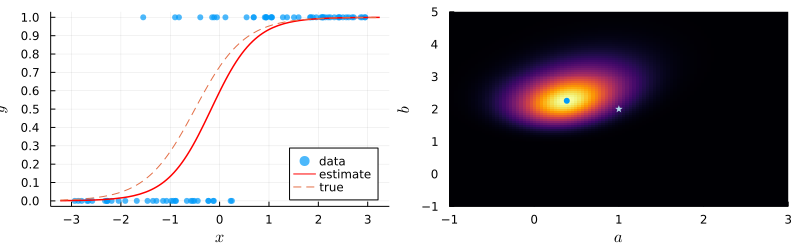

In [1]:
using Distributions
using Optim
using Random
Random.seed!(4649373)
using StatsFuns
using StatsPlots
default(fmt=:png, titlefontsize=10, size=(400, 250))

logisticmodel(x, a, b) = Bernoulli(logistic(a + b*x))

randlogistic(x, a, b) = @. rand(logisticmodel(x, a, b))

neglogliklogistic(x, y, a, b) =
    -sum(logpdf(logisticmodel(x, a, b), y) for (x, y) in zip(x, y))

function logistic_regression(x, y; alg=LBFGS())
    f(w) = neglogliklogistic(x, y, w[1], w[2])
    o = optimize(f, zeros(2), alg)
    o.minimizer
end

function plot_logistic_regression(; a₀=1.0, b₀=2.0, x=rand(Uniform(-3, 3), 80), alg=LBFGS())
    y = randlogistic(x, a₀, b₀)

    @show a₀, b₀
    @show â, b̂ = logistic_regression(x, y; alg)

    a = range(-1, 3, 100)
    b = range(-1, 5, 100)
    negloglik = neglogliklogistic.(Ref(x), Ref(y), a', b)
    
    xlim = extrema(x)
    xlim = xlim[1] - 0.05*(xlim[2] - xlim[1]), xlim[2] + 0.05*(xlim[2] - xlim[1])
    P = scatter(x, y; ms=4, msc=:auto, alpha=0.7, label="data", legend=:bottomright)
    plot!(x -> logistic(â + b̂*x), xlim...; label="estimate", c=:red, lw=1.5)
    plot!(x -> logistic(a₀ + b₀*x), xlim...; label="true", ls=:dash, c=2)
    plot!(xguide="\$x\$", yguide="\$y\$")
    plot!(ytick=0:0.1:1)
    plot!(bottommargin=4Plots.mm)

    Q = heatmap(a, b, exp.(-negloglik); colorbar=false)
    scatter!([â], [b̂]; label="", c=1, msc=:auto)
    scatter!([a₀], [b₀]; label="", c=:lightblue, msc=:auto, marker=:star)
    plot!(xlim=extrema(a), ylim=extrema(b))
    plot!(xguide="\$a\$", yguide="\$b\$")

    plot(P, Q; size=(800, 250))
end

plot_logistic_regression()

(a₀, b₀) = (1.0, 2.0)
(â, b̂) = logistic_regression(x, y; alg) = [0.7917336061056948, 2.116061783558987]


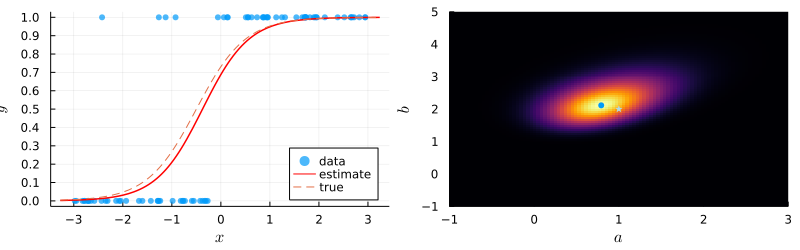

In [2]:
plot_logistic_regression()

(a₀, b₀) = (1.0, 2.0)
(â, b̂) = logistic_regression(x, y; alg) = [0.795759516263846, 3.070242645457568]


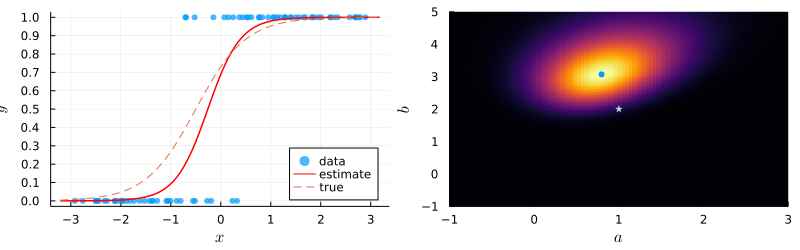

In [3]:
plot_logistic_regression()

(a₀, b₀) = (1.0, 2.0)
(â, b̂) = logistic_regression(x, y; alg) = [0.3907826252185117, 1.6861149594047855]


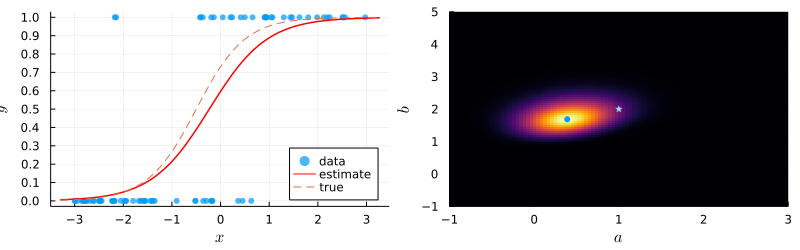

In [4]:
plot_logistic_regression()

(a₀, b₀) = (1.0, 2.0)
(â, b̂) = logistic_regression(x, y; alg) = [1.0525973355725935, 2.306735708925868]


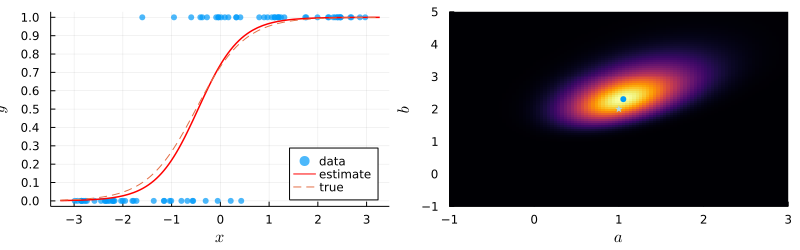

In [5]:
plot_logistic_regression()

(a₀, b₀) = (1.0, 2.0)
(â, b̂) = logistic_regression(x, y; alg) = [2.1723378245415694, 2.9395969810018783]


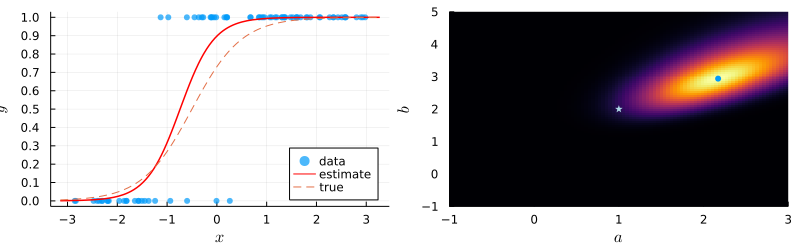

In [6]:
plot_logistic_regression()

(a0, b10, b20) = (1.0, 2.0, -2.0)
(â, b̂₁, b̂₂) = logistic_regression_2d(x1, x2, y; alg) = [0.9934937921720711, 2.6361858399365086, -2.5015700867253847]


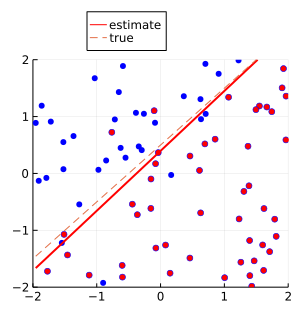

In [7]:
using Distributions
using Optim
using Random
Random.seed!(4649373)
using StatsFuns
using StatsPlots
default(fmt=:png, titlefontsize=10, size=(400, 250))

logisticmodel_2d(x1, x2, a, b1, b2) = Bernoulli(logistic(a + b1*x1 + b2*x2))

randlogistic_2d(x1, x2, a, b1, b2) = @. rand(logisticmodel_2d(x1, x2, a, b1, b2))

neglogliklogistic_2d(x1, x2, y, a, b1, b2) =
    -sum(logpdf(logisticmodel_2d(x1, x2, a, b1, b2), y) for (x1, x2, y) in zip(x1, x2, y))

function logistic_regression_2d(x1, x2, y; alg=LBFGS())
    f(w) = neglogliklogistic_2d(x1, x2, y, w[1], w[2], w[3])
    o = optimize(f, zeros(3), alg)
    o.minimizer
end

function logistic_regression_2d(; a0 = 1.0, b10 = 2.0, b20 = -2.0, n = 80, alg = LBFGS())
    x1, x2 = rand(Uniform(-2, 2), n), rand(Uniform(-2, 2), n)
    y = randlogistic_2d(x1, x2, a0, b10, b20)

    @show a0, b10, b20
    @show â, b̂₁, b̂₂ = logistic_regression_2d(x1, x2, y; alg)

    scatter(x1, x2; label="", c=:bwr, msc=:auto, marker_z=y, colorbar=false)
    plot!(x1 -> -(â + b̂₁*x1)/b̂₂; label="estimate", c=:red, lw=2)
    plot!(x1 -> -(a0 + b10*x1)/b20; label="true", c=2, ls=:dash)
    plot!(xlim=(-2, 2), ylim=(-2, 2), legend=:outertop)
    plot!(size=(300, 320))
end

logistic_regression_2d()

(a0, b10, b20) = (1.0, 2.0, -2.0)
(â, b̂₁, b̂₂) = logistic_regression_2d(x1, x2, y; alg) = [0.443693467541449, 0.9317884287829331, -1.6311355839389716]


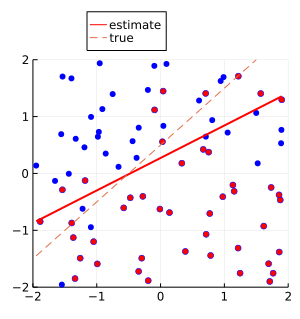

In [8]:
logistic_regression_2d()

(a0, b10, b20) = (1.0, 2.0, -2.0)
(â, b̂₁, b̂₂) = logistic_regression_2d(x1, x2, y; alg) = [0.7838009595378344, 1.9156876461619439, -1.9958906023383487]


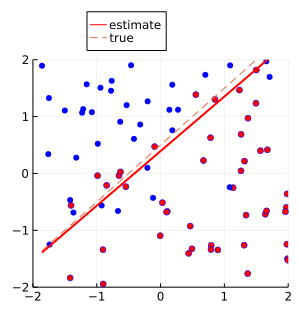

In [9]:
logistic_regression_2d()

(a0, b10, b20) = (1.0, 2.0, -2.0)
(â, b̂₁, b̂₂) = logistic_regression_2d(x1, x2, y; alg) = [1.6171765180456836, 4.316262125996935, -4.623574594508263]


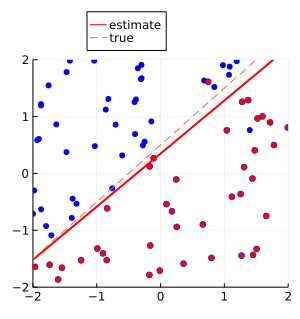

In [10]:
logistic_regression_2d()

(a0, b10, b20) = (1.0, 2.0, -2.0)
(â, b̂₁, b̂₂) = logistic_regression_2d(x1, x2, y; alg) = [1.5434187328314397, 1.6313303111831428, -1.8197109589749443]


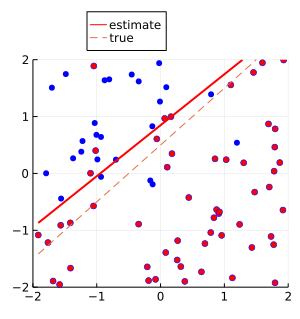

In [11]:
logistic_regression_2d()

(a0, b10, b20) = (1.0, 2.0, -2.0)
(â, b̂₁, b̂₂) = logistic_regression_2d(x1, x2, y; alg) = [1.5316463807273533, 2.7384946700768826, -2.3579006078359845]


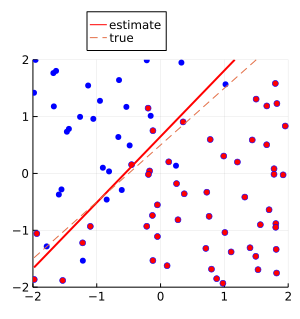

In [12]:
logistic_regression_2d()